# Trends, Patterns, and Directions in the 2023 U.S. Job Market

**Introduction:** The team members, Eugene Lim and Tyler Simms, will be using a dataset on 2023 LinkedIn job post listings over a two day period during the year to identify trends within the current US job market. Our working project title is "Trends, Patterns, and Directions in the 2023 U.S. Job Market". We will be working with this dataset because it provides great detail, and several important variables we could use for analysis such as the type of job, pay period, salary, company ID, and whether remote work is allowed or not. The dataset is Kaggle from and its title is "LinkedIn Job Postings - 2023". The dataset was collected by user Arsh Kon using LinkedIn's backend search API over the period July 23-24, 2023. The dataset has separate companion dataframes which add information about companies, industries, and benefits that follow the principles of tidy data. Other datasets do not necessarily seem like they will be needed but we may find others in the future to expand our possibilities for analysis.

Hyperlink to github.io webstie: https://eugenelim17.github.io/

Link to dataset: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

Link to GitHub repo: https://github.com/eugenelim17/eugenelim17.github.io/tree/main

Link to Trello Board: https://trello.com/b/nKeaOhI6/data-science-job-market-project

**Collaboration Plan:** We plan to meet once a week through Zoom in order to work on the project. Alternative ways in which we will communicate include via text message and on a Trello dashboard where we will be uploading any important updates, questions, and idea proposals that we may have. We have also created a Github repo that is shared with each other in order to organize, update and maintain official versions of our code. We will be collaborating on the code in our notebook file through Google Colab.

In [1]:
!git clone https://github.com/eugenelim17/eugenelim17.github.io

Cloning into 'eugenelim17.github.io'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 71 (delta 36), reused 6 (delta 2), pack-reused 0
Receiving objects: 100% (71/71), 21.11 MiB | 11.82 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

job_postings_df = pd.read_csv("eugenelim17.github.io/job_postings.csv.zip", compression="zip")

# Dataframe before any cleaning or modification
job_postings_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,1.690000e+12,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,1.690000e+12,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,1.690000e+12,NaN,17.0,https://www.linkedin.com/jobs/view/133196985/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",NaN,1.690000e+12,NaN,NaN,https://www.linkedin.com/jobs/view/381055942/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",NaN,1.690000e+12,NaN,2.0,https://www.linkedin.com/jobs/view/529257371/?...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",NaN,1.690000e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3701373516/...,https://aspirebakeriescareers.com/job/West-Col...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",2.0,1.690000e+12,NaN,7.0,https://www.linkedin.com/jobs/view/3701373522/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",NaN,1.690000e+12,NaN,3.0,https://www.linkedin.com/jobs/view/3701373523/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",NaN,1.690000e+12,NaN,10.0,https://www.linkedin.com/jobs/view/3701373524/...,https://opportunities.columbia.edu/jobs/mri-ma...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


**Project Plan:** As mentioned in the introduction and seen above in the displayed dataframe, our dataset includes a high volume of observations on individual LinkedIn job post listings that appeaared on the LinkedIn website over July 23-24, 2023. Our team has chosen this dataset because the dataset is quite comprehensive and the creater did significant due dilligence in gathering the data for each observation. Our first question we hope to answer is "What is the relationship between jobs that are in person and remote with regard to compensation?" The dataset contains a variable that already categorizes each job as in person or remote. Through filtering on this variable, we can find material and interesting differences based on other relevant variables. Our second question, or really set of questions, includes those such as "What industries have the highest and lowest salaries and benefits?", "What are the most lucrative individual job titles regardless of industry?", "Which geographic job locations, states, and cities have the highest and lowest salaries and benefits?", and "What companies have job posting with the most lucrative salaries and benefits?" These questions can all be answered through the values in the 27 columns of the original dataset. Some of the most useful columns include company ID, job title, maximum, median, and minimum salary, location, and benefit information, which is included in one of the companion dataframes.

In [3]:
# Dataframe data types before any adjustment to the types
job_postings_df.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

In [4]:
job_postings_df["job_id"] = job_postings_df["job_id"].astype(str)
job_postings_df["company_id"] = job_postings_df["company_id"].astype(str)

In [5]:
# Dataframe data types after adjustment to some of the types
job_postings_df.dtypes

job_id                         object
company_id                     object
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

Listed above are the variables in the dataframe and their data types. We have changed the datatype of job_id and company_id to object since IDs are a categorical variable.

In [6]:
# Rows that do not have a compensation type are removed here using .notna()

job_postings_df[job_postings_df['compensation_type'].isnull()]
job_postings_df[job_postings_df['compensation_type'].isnull()]["max_salary"].isnull().sum()
job_postings_df[job_postings_df['compensation_type'].isnull()]["med_salary"].isnull().sum()
job_postings_df[job_postings_df['compensation_type'].isnull()]["min_salary"].isnull().sum()
job_postings_df = job_postings_df[job_postings_df['compensation_type'].notna()]

Our first step of the data cleaning portion of the project was to ensure that all the job post observations we were using had a compensation type value included. We identified that every observation without a compensation type value had no maximium salary, minimum salary, and median salary. Job postings without salary information are essentailly useless in our analysis because salary information is vital. When looking at the dataset, 9,348 job postings did not include a compensation value. So in order to get rid of these rows without a compensation type, we have used the .notna() function.

In [7]:
# Any salary that is on an hourly basis is adjusted to a yearly salary by multiplying by 40 since that is the American national standard for weekly hours worked
# and then multiplying by 52 because there are 52 weeks in a year.
job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['max_salary'], axis=1)
job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['med_salary'], axis=1)
job_postings_df['min_salary'] = job_postings_df.apply(lambda row: row['min_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['min_salary'], axis=1)

job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['max_salary'], axis=1)
job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['med_salary'], axis=1)
job_postings_df['min_salary'] = job_postings_df.apply(lambda row: row['min_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['min_salary'], axis=1)

job_postings_df['pay_period'] = 'Yearly'  # Updates all the pay period values to 'Yearly'

<ipython-input-7-564058041d32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['max_salary'], axis=1)
<ipython-input-7-564058041d32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['med_salary'], axis=1)
<ipython-input-7-564058041d32>:5: 

After removing the rows with no compensation type, we see that there are three different compensation types: hourly, monthly, and yearly. The salaries among job listings are much easier to compare if the salaries are all one compensation type, so we decided to convert all the salaries to yearly salaries. This conversion is done by multiplying any salary that is hourly by 40 since that is the American standard of hours worked per week, and then multiplying by 52 since there are 52 weeks in a year. Any salary that is monthly is multiplied by 12 since there are 12 months in a year.

In [8]:
# Fill the "remote_allowed" column for in-person workers with a value of 0
job_postings_df['remote_allowed'] = job_postings_df['remote_allowed'].fillna(0)

# Create new filtered dataframes to help calculate summary statistics for remote and in-person workers based on yearly median salary
remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 1]
in_person = job_postings_df[job_postings_df['remote_allowed'] == 0]

<ipython-input-8-597bfe9e81f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_postings_df['remote_allowed'] = job_postings_df['remote_allowed'].fillna(0)


In the dataframe, we identified that job listings have a value of 1 in the "remote_allowed" column if they are remote positions, but if they are in person then they have a value of NaN in the column. We gave these in-person positions a value of 0 by simply using the .fillna() function with an argument of 0.

In [9]:
# Summary statistics for remote workers
summary_remote = remote_workers['med_salary'].describe()

# Summary statistics for in-person workers
summary_in_person = in_person['med_salary'].describe()

# Print the summary statistics
print("Summary Statistics for Remote Positions:")
print(summary_remote)

print("\nSummary Statistics for In-Person Positions:")
print(summary_in_person)

Summary Statistics for Remote Positions:
count       117.000000
mean     124759.309402
std      148034.308594
min       12000.000000
25%       41600.000000
50%       91520.000000
75%      150000.000000
max      800000.000000
Name: med_salary, dtype: float64

Summary Statistics for In-Person Positions:
count       864.000000
mean      70000.259109
std       68801.396689
min       10000.000000
25%       36400.000000
50%       46633.600000
75%       75000.000000
max      998426.000000
Name: med_salary, dtype: float64


When comparing the two types of workers by their summary statistics, we can see that the remote positions have a significantly higher average median salary (124,759.31 USD) compared to in-person positions (70,000.26 USD). Both categories also have relatively high standard deviations, which indicates a wide variation in salaries, but remote postions have a higher standard deviation. The higher standard deviation for remote positions is likely due to there being less remote positions with a value in the median salary column than in-person positions. We can already predict both will be skewed right in a graph, since the means for both types of workers are greater than their medians, which are seen from the 50th percentile. The main interesting result we see when comparing the two types of positions is that the mean median salary for remote positions is significantly higher (approximately 124,759 USD) compared to that of the in-person positions (approximately 70,000 USD), which indicates that remote work may be associated with greater earning potential. One reason why this  may be the case is because remote work allows companies to tap into a global talent pool. They can hire the best candidates, regardless of their physical location, which can lead to increased competition for top talent around the world. These comparisons are relevant to the question about how in person and remote postions differ relative to compensation.

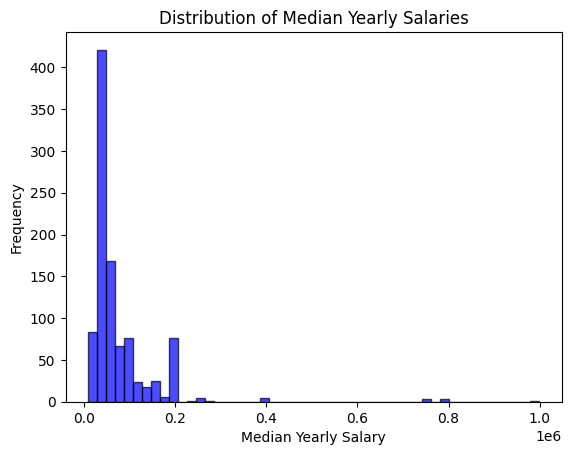

In [10]:
job_postings_df['med_salary'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries')
plt.xlabel('Median Yearly Salary')
plt.ylabel('Frequency')
plt.show()

Shown above is a histogram which shows the distribution of median yearly salaries. The distribution is orginally skewed heavily to the right without any transformations because a majority of salaries are less than 100,000 USD, with few job post listings having a salary even as high as 150,000 USD.

<ipython-input-11-70a84fafbc86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_postings_df['med_salary_log'] = np.log1p(job_postings_df['med_salary'])


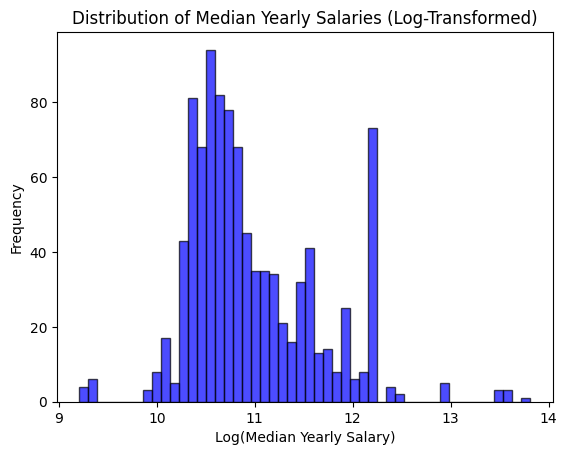

In [11]:
job_postings_df['med_salary_log'] = np.log1p(job_postings_df['med_salary'])
job_postings_df['med_salary_log'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries (Log-Transformed)')

# Set labels and title
plt.xlabel('Log(Median Yearly Salary)')
plt.ylabel('Frequency')
plt.show()

To improve the skew we have applied a logarithmic transformation, specifically by taking in the logarithmic value each of the median salaries, which makes the histogram look much more symmetrical. The distribution is still right skewed to a certain degree so the symmetry can be further improved in the future. An interesting conclusion from this histrogram is that although the right skew of the distribution does smooth out while moving up the x-axis in a relatively normal way, we see that there is a significant spike around 12 in the median yearly salary. We predicted that there would be one parabolic curve within the graph, but there appears to be a lot of jobs in the market that pay around the 200,000 USD range (This x-axis value is taken from the original histogram before any transformations). This histogram is relevant to gaining a better understanding of the overall distribution of median yearly salaries and can be applied on smaller subsets of the dataframe after filtering on certain columns to visualize the differences in the distribution for each of these subsets.

In [12]:
# Define the mapping from job titles to industries
job_title_to_industry_mapping = {
    "Warehouse Order Selector": "Warehouse",
    "Package Handler (Warehouse like)": "Warehouse",
    "Warehouse Associate": "Warehouse",
    "Warehouse Worker - SAS Safety Corp.": "Warehouse",
    "Equipment Technician": "Technician",
    "Field Service Technician": "Technician",
    "Pest Control Technician": "Technician",
    "Central Services Technician": "Technician"
}

# Use the .replace() method to create the 'industries' column
job_postings_df['industries'] = job_postings_df['title'].replace(job_title_to_industry_mapping)

<ipython-input-12-9ed3d879521c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_postings_df['industries'] = job_postings_df['title'].replace(job_title_to_industry_mapping)


Here a map called "Industries" is created, where eight occupations are organized into a dictionary based on what type of job they are, and the two types in this example are "Warehouse" and "Technician".

In [13]:
selected_industries = ["Warehouse", "Technician"]
filtered_df = job_postings_df[job_postings_df['industries'].isin(selected_industries)].copy()

# Summary statistics for "med_salary" for each industry
summary_statistics = filtered_df.groupby('industries')['med_salary'].describe()

# Print the summary statistics
print(summary_statistics)


            count          mean           std      min      25%      50%  \
industries                                                                 
Technician   11.0  50196.218182  12715.308459  41600.0  42500.0  42640.0   
Warehouse    16.0  41233.800000  12502.981055  31200.0  33280.0  38740.0   

                75%      max  
industries                    
Technician  50679.2  75000.0  
Warehouse   41459.6  82000.0  


We use .groupby() and .describe() to compare the summary statistics between technicians and warehouse workers. As seen from the summary statistics, we can see the "Technician" industry generally offers the higher average median salary, with an average around 50,196.22 USD, but with significant variation, which is evidenced by the high standard deviation. The "Warehouse" industry has a lower average median salary of around 41,233.80 USD, and has a slightly lower, but still considerable variation in salary. In both industries, there is a wide range of median salaries, with the maximum salaries being significantly higher than the average. This fact suggests that some job postings within these industries offer very high salaries relative to the rest of the job postings. One important detail we can see here is that the "Warehouse" industry, despite having a lower average median salary compared to the "Technician" industry, has a higher maximum value. In the "Warehouse" industry, the maximum salary is 82,000 USD, while in the "Technician" industry, it's 75,000 USD. This inconsistent statistic reflects that a substantial portion of workers in the "Warehouse" industry receive salaries significantly below this maximum value, as the average, minimum, 25th quartile, 50th quartile, and 75th quartile salary all favor the "Technician" industry and also indicates that there's a relatively lower floor for salaries in the "Warehouse" industry. This analysis reaffirms our previous understanding that the maximum median salary is an unrealistic amount for most workers in the "Warehouse" industry, the same being true to a slightly lesser extent for the "Technician" industry. Another interesting statistic is that the minimum median salary for the "Technician" industry is still greater than the average value for the "Warehouse" industry. The comparison of these industries' summary statistics for median yearly salary is relevant to the question about the best and worst industries for compensation.

In [14]:
# Dataframe after cleaning and modification
job_postings_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,med_salary_log,industries
0,85008768,nan,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,Yearly,Full-time,"Chico, CA",NaN,1.690000e+12,0.0,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,NaN,Licensed Insurance Agent
5,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,Yearly,Full-time,"Albany, GA",5.0,1.690000e+12,0.0,49.0,https://www.linkedin.com/jobs/view/903408693/?...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,NaN,Office Associate
8,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,104000.0,NaN,104000.0,Yearly,Part-time,"Muskegon, MI",NaN,1.690000e+12,0.0,4.0,https://www.linkedin.com/jobs/view/1029078768/...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,PART_TIME,USD,BASE_SALARY,NaN,Registered Nurse (RN) Vaccinator
12,1535492735,nan,Administrative Assistant,We are looking for a responsible Administrativ...,41600.0,NaN,37440.0,Yearly,Part-time,"Ocoee, FL",3.0,1.690000e+12,0.0,5.0,https://www.linkedin.com/jobs/view/1535492735/...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,PART_TIME,USD,BASE_SALARY,NaN,Administrative Assistant
13,1657978824,89350959.0,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...","REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...",144000.0,NaN,144000.0,Yearly,Contract,"Texas, United States",NaN,1.690000e+12,1.0,NaN,https://www.linkedin.com/jobs/view/1657978824/...,HTTP://AMERICANSTEELBUILDERS.COM,OffsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,USD,BASE_SALARY,NaN,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15871,3701373385,18312164.0,Sales Manager,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.0,NaN,60000.0,Yearly,Full-time,"Texas, United States",7.0,1.690000e+12,1.0,56.0,https://www.linkedin.com/jobs/view/3701373385/...,http://landings.bravado.co/vacancies/sales-man...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,NaN,Sales Manager
15875,3701373427,1321042.0,Design Intern,Looking to redefine the skyline or to be a par...,49691.2,NaN,39686.4,Yearly,Internship,"Miramar, FL",2.0,1.690000e+12,0.0,20.0,https://www.linkedin.com/jobs/view/3701373427/...,https://workforcenow.adp.com/mdf/recruitment/r...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,workforcenow.adp.com,0,INTERNSHIP,USD,BASE_SALARY,NaN,Design Intern
15876,3701373432,2121817.0,Continuous Improvement Specialist,Continuous Improvement Specialist Opportunity!...,NaN,200000.0,NaN,Yearly,Full-time,"Mississippi, United States",11.0,1.690000e+12,0.0,28.0,https://www.linkedin.com/jobs/view/3701373432/...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,12.206078,Continuous Improvement Specialist
15878,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.0,NaN,91900.0,Yearly,Full-time,"Torrance, CA",4.0,1.690000e+12,0.0,29.0,https://www.linkedin.com/jobs/view/3701373493/...,https://herbalifecareers.ttcportals.com/jobs/1...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,herbalifecareers.ttcportals.com,0,FULL_TIME,USD,BASE_SALARY,NaN,Sr. Bilingual Copywriter (Canadian French)
